In [1]:
import numpy as np
import scipy as sc
from config import config
from random import *
from collision import simulation
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits import mplot3d

In [2]:
config['detector_char']['resolution']

2.5e-05

In [3]:
sim = simulation()

In [4]:
rays, data = sim.sim_coll_()

In [5]:
rays = np.array(rays)

In [6]:
data = np.array(data)


In [7]:
data

array([[[-0.1879625,  0.2254875,  1.       ],
        [-0.3759125,  0.4509875,  2.       ],
        [-0.5638625,  0.6764875,  3.       ],
        [-0.7518375,  0.9019875,  4.       ],
        [-0.9397875,  1.1274875,  5.       ]],

       [[ 0.2409625, -0.0990375,  1.       ],
        [ 0.4819375, -0.1980875,  2.       ],
        [ 0.7228875, -0.2971125,  3.       ],
        [ 0.9638625, -0.3961625,  4.       ],
        [ 1.2048125, -0.4951875,  5.       ]],

       [[ 0.0835125, -0.2403375,  1.       ],
        [ 0.1670125, -0.4806625,  2.       ],
        [ 0.2505125, -0.7209875,  3.       ],
        [ 0.3340125, -0.9613125,  4.       ],
        [ 0.4175125, -1.2016375,  5.       ]],

       ...,

       [[-0.1723875,  0.1718375,  1.       ],
        [-0.3447875,  0.3436875,  2.       ],
        [-0.5171875,  0.5155375,  3.       ],
        [-0.6895875,  0.6873875,  4.       ],
        [-0.8619875,  0.8592125,  5.       ]],

       [[ 0.2468375,  0.0783125,  1.       ],
        [ 0.4

In [8]:
data[0][:]

array([[-0.1879625,  0.2254875,  1.       ],
       [-0.3759125,  0.4509875,  2.       ],
       [-0.5638625,  0.6764875,  3.       ],
       [-0.7518375,  0.9019875,  4.       ],
       [-0.9397875,  1.1274875,  5.       ]])

In [9]:
#b[:,:, 0]
color_ = ['k', 'r', 'b', 'y', 'g', 'c', 'm']

/tmp/ipykernel_12611/1786888561.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


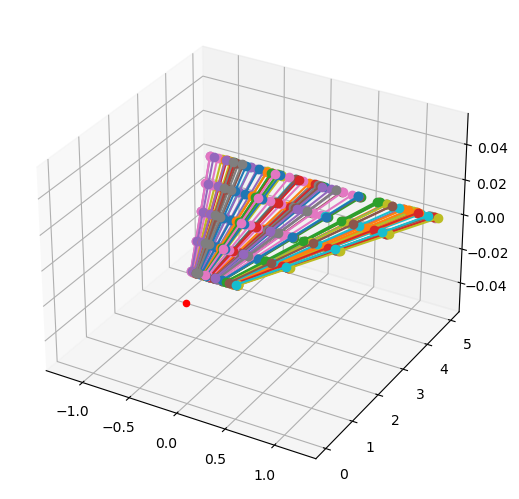

In [16]:
fig = plt.figure()
ax = Axes3D(fig)
l_2_p = 1/2
l_2_n = -1/2

x_d = [-1/2,1/2,1/2,-1/2],[0,1,1,0]
y_d = [-1/2,-1/2,1/2,1/2],[0,0,1,1]
z_d = [0,0,0,0],[1,1,1,1]

surfaces = []

#for i in range(len(x_d)):
#    surfaces.append( [list(zip(x_d[i],y_d[i],z_d[i]))] )
#
#for surface in surfaces:
#    ax.add_collection3d(Poly3DCollection(surface))
for i,j in enumerate(data[:,:, 0]): 
# Data for a three-dimensional line
    ax.plot(data[:,:, 0][i], data[:,:, 2][i],'-o')
#ax.scatter3D(a[0][0], a[0][1], a[0][2], color='k')
ax.scatter(0,0,0, color='r')

In [11]:
tracks = []
for i,_ in enumerate(data[:,:,0]):




















    
    rays_2, tmp_track = sim.tracks(rays, data[i])
    tracks.append(tmp_track)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/kruteesh/miniconda3/envs/pdm/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_12611/1187922120.py", line 3, in <cell line: 2>
    rays_2, tmp_track = sim.tracks(rays, data[i])
  File "/home/kruteesh/Desktop/Collab_key_qual/main_b/CollaborativeDev/collision.py", line 69, in tracks
    dir = self.fitting.direction_fitting(dete_data[i])
  File "/home/kruteesh/Desktop/Collab_key_qual/main_b/CollaborativeDev/Direction_fitting.py", line 31, in direction_fitting
    x = data_array[:,0]
IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/kruteesh/miniconda3/envs/pdm/lib/python3.10/site-packages/executing/executing.py", line 317, in executing
    args = executing_cache[key]
KeyError: (<